### Parameters & Imports

In [1]:
from keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 320, 240
train_data_dir = 'datasets/UCF11/frames/train'
validation_data_dir = 'datasets/UCF11/frames/test'

Using TensorFlow backend.
/Users/okyksl/miniconda3/envs/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


### Data Generators

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    horizontal_flip=True,
    rotation_range=10.,
    width_shift_range=0.2,
    height_shift_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width)
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width)
)

Found 7365 images belonging to 11 classes.
Found 1825 images belonging to 11 classes.


### Visualize Data

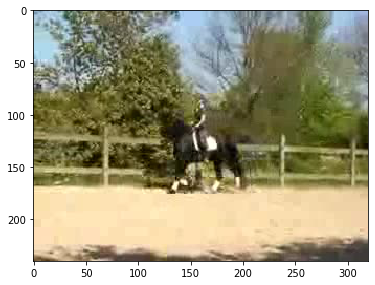

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

batch = validation_generator.next()
image = batch[0][0]
plt.figure(figsize=(6, 8))
plt.imshow(image)

### Augment Brightness

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


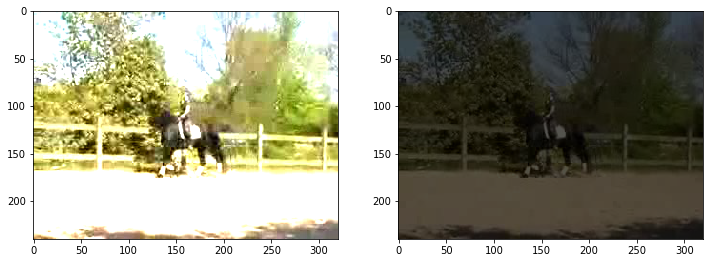

In [13]:
from scripts.augmentations.augment_brightness import augment_brightness

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow( augment_brightness(image, low=1.3, high=2.0) )

plt.subplot(1, 2, 2)
plt.imshow( augment_brightness(image, low=0.3, high=0.7) )

### Augment Lighting (imgaug)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


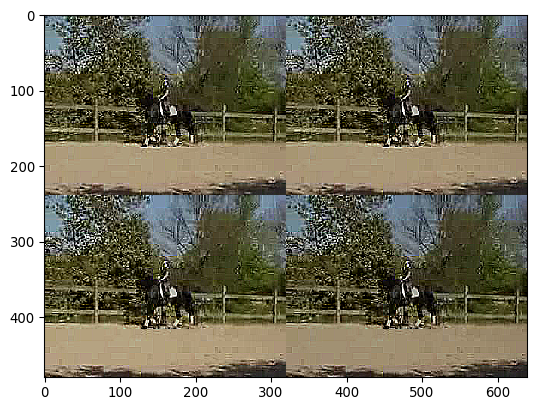

In [14]:
import imgaug.augmenters as iaa

seq = iaa.Sequential([iaa.Sharpen(alpha=0.5, lightness=(0.1, 1.0))])
seq.show_grid([image], cols=2, rows=2)

### Add Gaussian Noise (imgaug)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


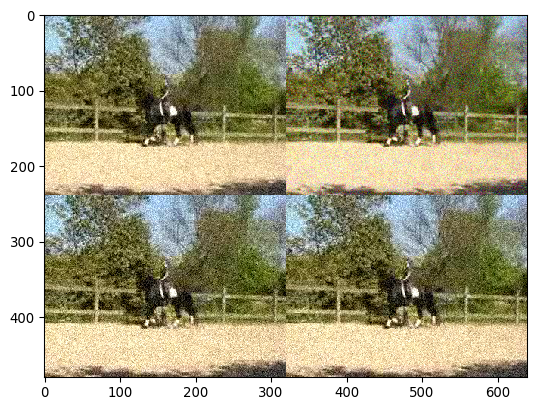

In [16]:
seq = iaa.Sequential([iaa.AdditiveGaussianNoise(loc=0, scale=(0.05, 0.1), per_channel=0.5)])
seq.show_grid([image], cols=2, rows=2)